<a href="https://colab.research.google.com/github/GraceJulius/FDSFE_GJulius/blob/main/Class%20Demo/NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
y_train.shape

(60000,)

In [4]:
x_train.shape

(60000, 28, 28)

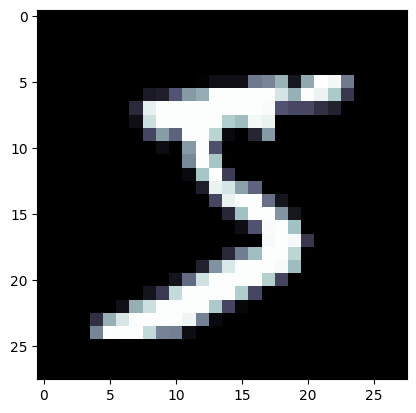

In [5]:
plt.imshow(x_train[0], cmap="bone");

In [6]:
# check how many values are in the target variable
# your code goes here
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [7]:
# check what is the min and max value and data type of the features dataset
# your code goes here
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

In [8]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling)
# your code goes here
x_train = x_train/255.
x_test = x_test/255.

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
28*28

784

In [11]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation = linear))
model.add(tf.keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'linear' is not defined

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=5)

In [ ]:
plt.plot(training_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.predict(x_test[:5])

In [ ]:
# is this model overfitting? how woudl you find out?

In [ ]:
y_test[:5]

In [ ]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# your code goes hereprob_model.summary()

In [ ]:
model.summary()


In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#set the loss to be SparseCategoricalCrossentropy(), the optimizer to Adam and compile and fit as before
loss = ...
optimizer = ...
prob_model.compile...
prob_training_history = ...

In [ ]:
prob_model.evaluate(x_test, y_test)

In [ ]:
result = prob_model.predict(x_test[:10])

In [ ]:
result

In [ ]:
plt.imshow(x_test[8])

In [ ]:
for i,result in enumerate(prob_model.predict(x_test[:10])):
  plt.figure(figsize=(10,3))
  plt.plot(range(10), result, label=y_test[i])
  plt.plot(range(10)[np.argmax(result)], np.max(result), '.')
  plt.axvline(range(10)[np.argmax(result)])
  plt.legend()
  plt.xlabel("value")
  plt.ylabel('predicted "probability" ')
  plt.show()